### Домашнее задание №12 по курсу "Машинное обучение"

Новик Никита

### Задание 2

In [22]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:-1,:]
y = iris.target[:-1]

labels = ["Setosa", "Versicolour", "Virginica"]
Setosa      = y == 0
Versicolour = y == 1
Virginica   = y == 2

### t-SNE

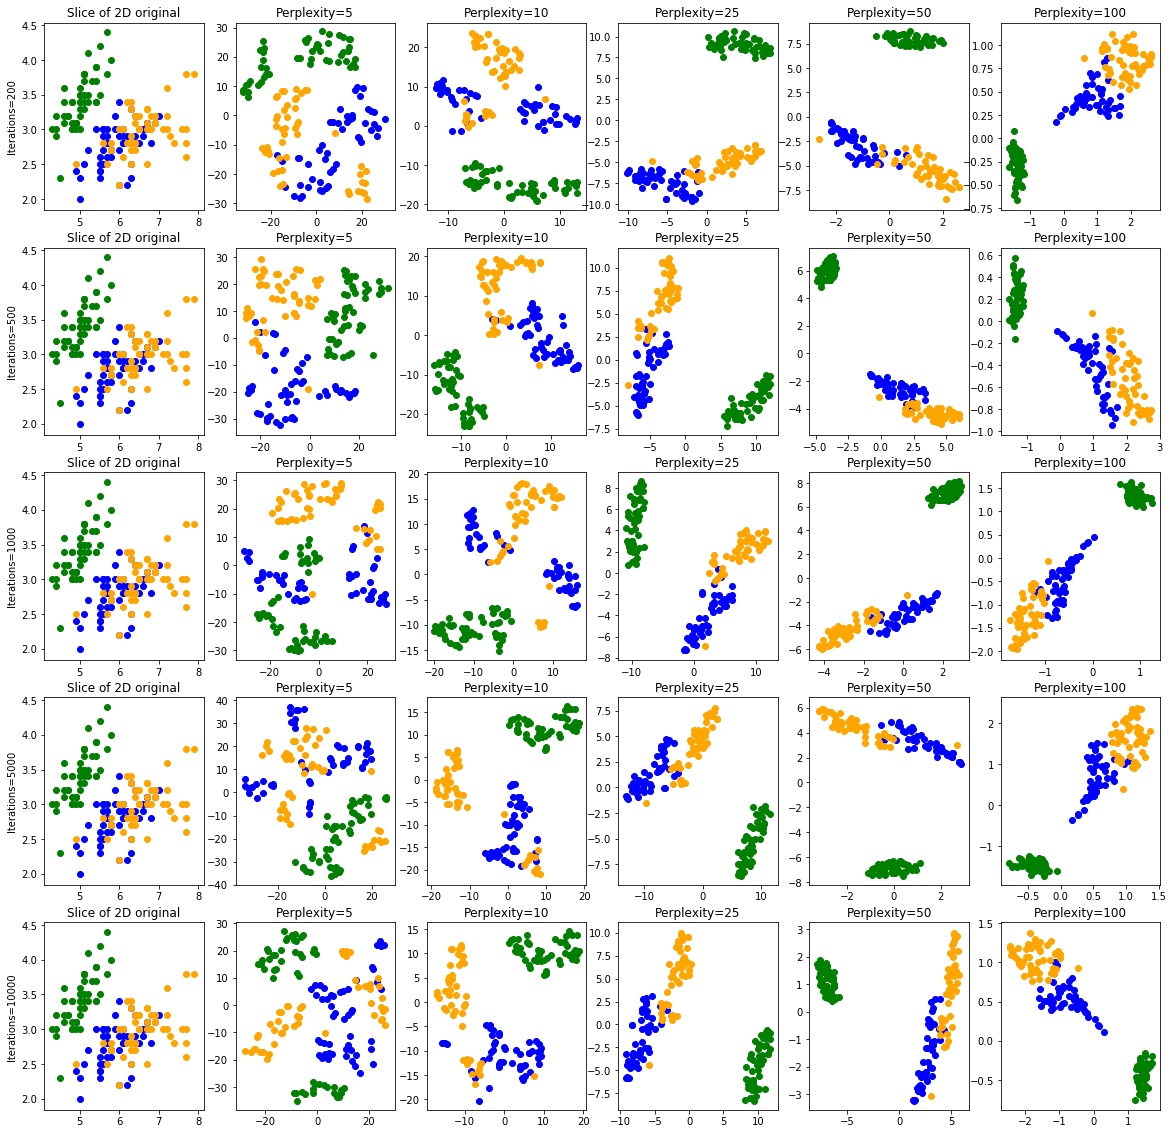

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

perplexities = [5, 10, 25, 50, 100]
iterations = [200, 500, 1000, 5000, 10000]
(fig, subplots) = plt.subplots(5, 6, figsize=(20, 20))

for i, iteration in enumerate(iterations):
    ax = subplots[i][0]

    ax.set_title("Slice of 2D original")
    ax.scatter(X[Setosa, 0],      X[Setosa, 1],      c="green")
    ax.scatter(X[Versicolour, 0], X[Versicolour, 1], c="blue")
    ax.scatter(X[Virginica, 0],   X[Virginica, 1],   c="orange")
    ax.set_ylabel("Iterations=%d" % iteration)

    for j, perplexity in enumerate(perplexities):
        tNSE = TSNE(n_components=2, learning_rate=200.0, 
                    perplexity=perplexity, n_iter=iteration)

        Y = tNSE.fit_transform(X)
        
        ax = subplots[i][j + 1]
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[Setosa, 0],      Y[Setosa, 1],      c="green")
        ax.scatter(Y[Versicolour, 0], Y[Versicolour, 1], c="blue")
        ax.scatter(Y[Virginica, 0],   Y[Virginica, 1],   c="orange")
  
plt.show()

### PCA

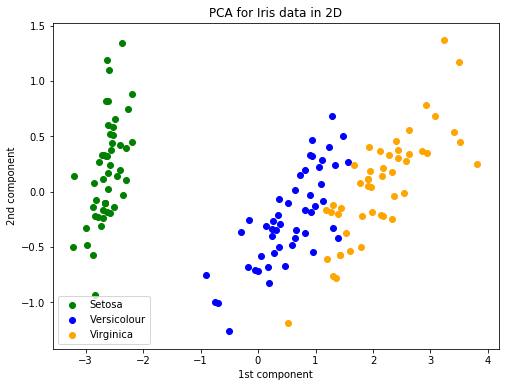

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def show_3D_plot(X, title):
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    X_reduced = PCA(n_components=3).fit_transform(X)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
               cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title(title)
    ax.set_xlabel("1st component")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd component")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd component")
    ax.w_zaxis.set_ticklabels([])
    plt.show()
    
#show_3D_plot(X[:, :3], "Slice of first 3 dimensions")
#show_3D_plot(X, "First three PCA directions")

fig = plt.figure(1, figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(X)
colors = ['green', 'blue', 'orange']
for color, i, target_name in zip(colors, [0, 1, 2], labels):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], 
                color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("PCA for Iris data in 2D")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

### Выводы

Для Iris dataset понравился больше PCA в силу быстроты, постоянности результата (результат получается всегда один и тот же) и отсутствия настройки гиперпараметров алгоритма, а также четкости результата (хотя t-SNE тоже дает хорошие результаты, но надо играться с perplexity). Создается впечатление, что t-SNE лучше применять на данных с большой размерностью (хотя пишут, что сложность растет quadratic от количества объектов в t-SNE и на действительно больших размерностях лучше применить другие методы).